In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [110]:
df=pd.read_csv('C:/Users/PC/Documents/Data+Science+for+Business+Package/DataScienceforBusinessPackage/2. Marketing Department/Marketing_data.csv')
df
# CUSTID: Identificación del titular de la tarjeta de crédito
# BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
# BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
# PURCHASES: Cantidad de compras realizadas desde la cuenta
# ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
# INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
# CASH_ADVANCE: Anticipo otorgado al usuario
# PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
# PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
# ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
# PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
# CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
# CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
# PURCHASES_TRX: número de transacciones de compras realizadas
# CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
# PAYMENTS: Número de pagos realizados por el usuario
# MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
# PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
# TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [112]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [113]:
#Ver al cliente que realizó compra de $40761
df[df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [114]:
df[df['CASH_ADVANCE']==47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<Axes: >

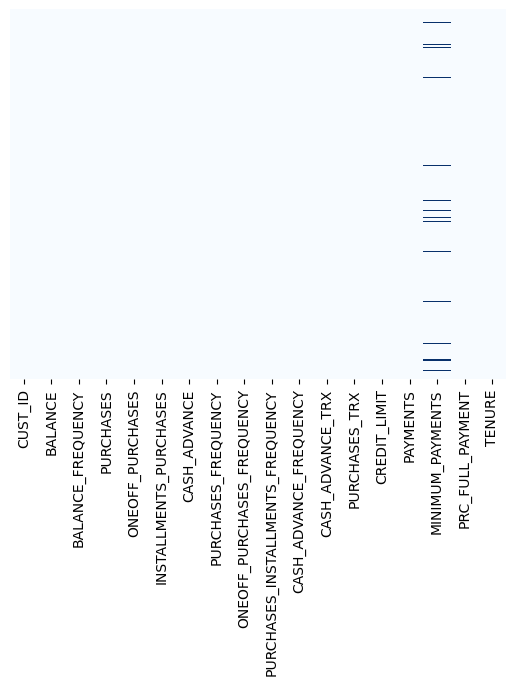

In [115]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='Blues')

In [116]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [117]:
#Rellenar los valores faltantes con el promedio del campo
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()

In [118]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [119]:
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

<Axes: >

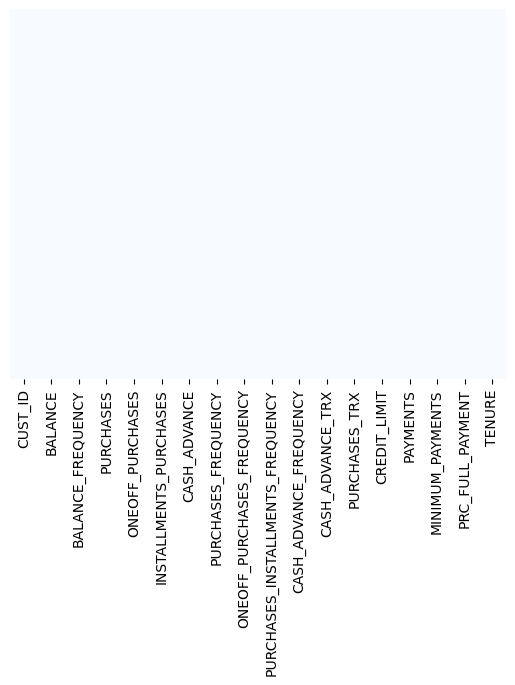

In [120]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='Blues')

In [121]:
df.duplicated().sum() #Ver si hay un cliente duplicado

0

In [122]:
df.drop('CUST_ID', axis=1 , inplace=True)

In [123]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [124]:
n= len(df.columns)
n

17

In [125]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\PC\AppData\Local\Temp\ipykernel_24416\3211169021.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]],kde_kws={'color':'b','lw': 3, 'label':'KDE'}, hist_kws={'color':'g'})
C:\Users\PC\AppData\Local\Temp\ipykernel_24416\3211169021.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

C:\Users\PC\AppData\Local\Temp\ipykernel_24416\3211169021.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]],kde_kws={'color':'b','lw': 3, 'label':'KDE'}, hist_kws={'color':'g'})
C:\Users\PC\AppData\Local\Temp\ipykernel_24416\3211169021.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

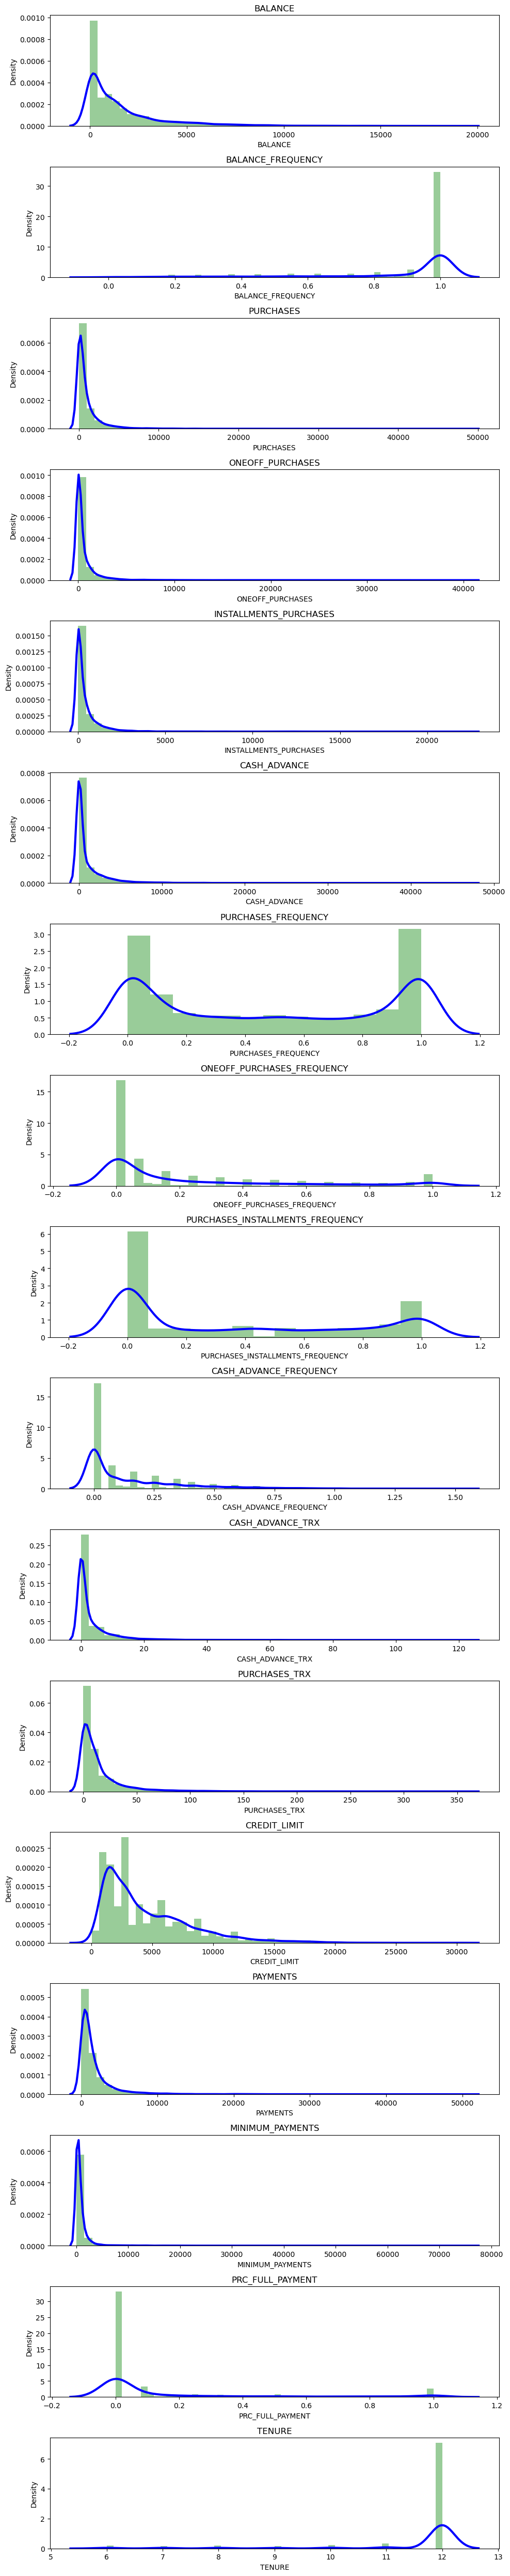

In [126]:
plt.figure(figsize=(10,50))
for i in range(n):
    plt.subplot(n,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','lw': 3, 'label':'KDE'}, hist_kws={'color':'g'})
    plt.title(df.columns[i])

plt.tight_layout()

In [127]:
correlations=df.corr()

<Axes: >

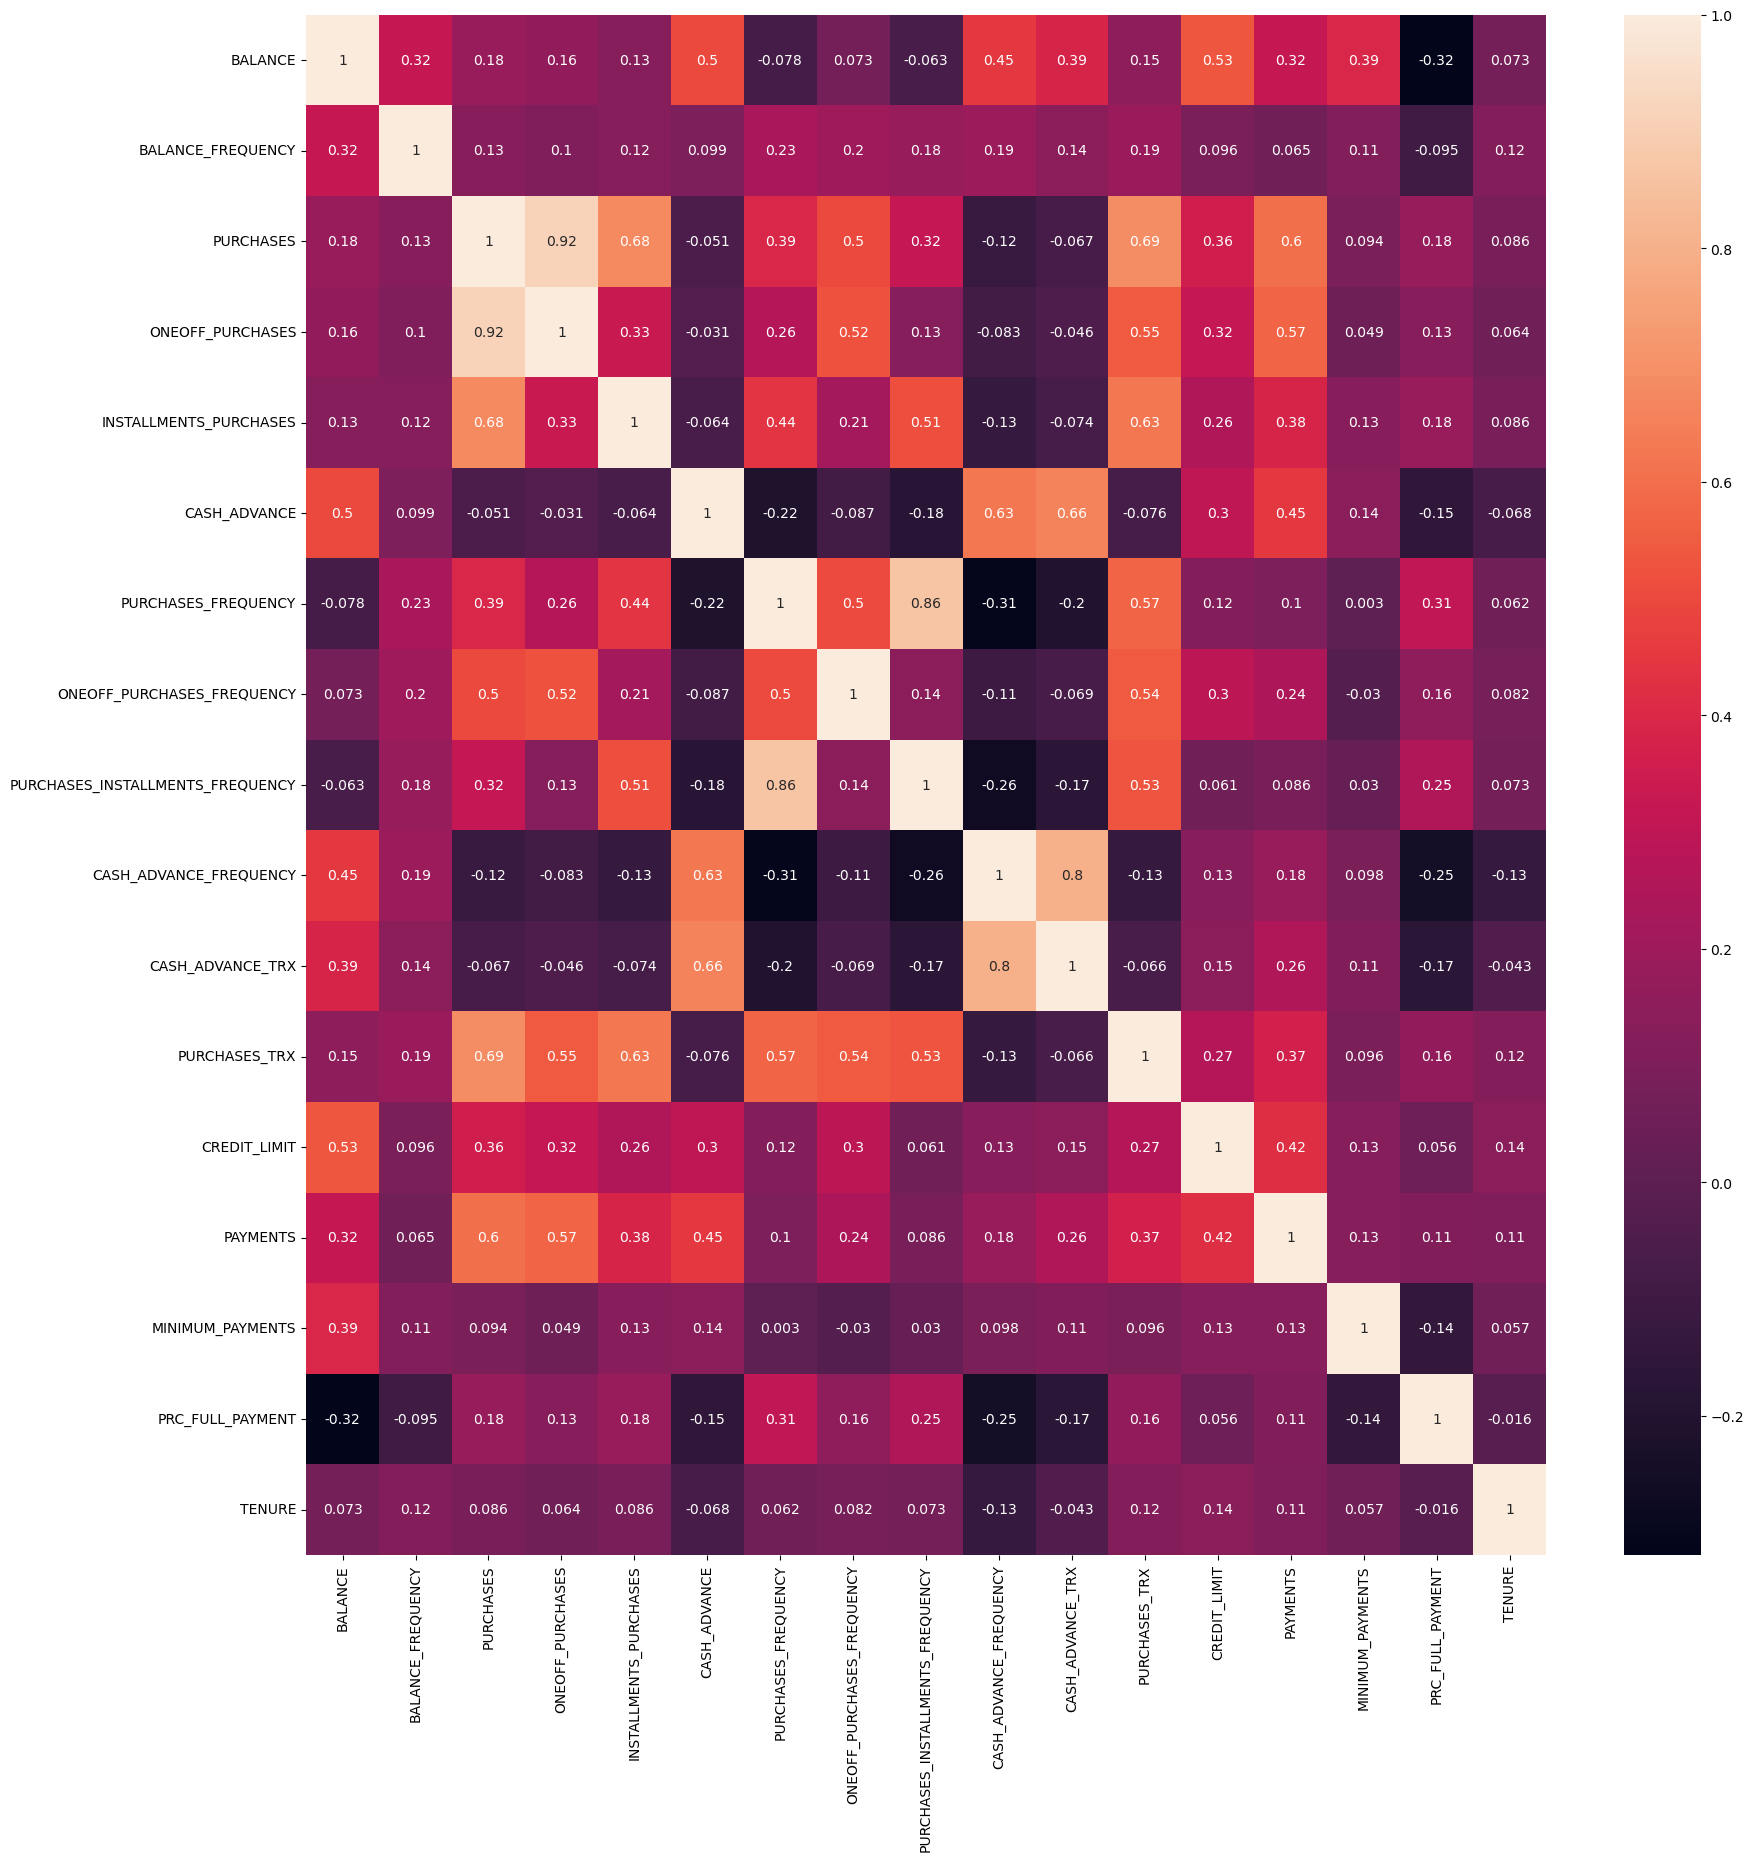

In [128]:
f, ax= plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot=True)

In [129]:
scaler= StandardScaler()
df_scaled=scaler.fit_transform(df)

In [130]:
df_scaled.shape

(8950, 17)

In [131]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

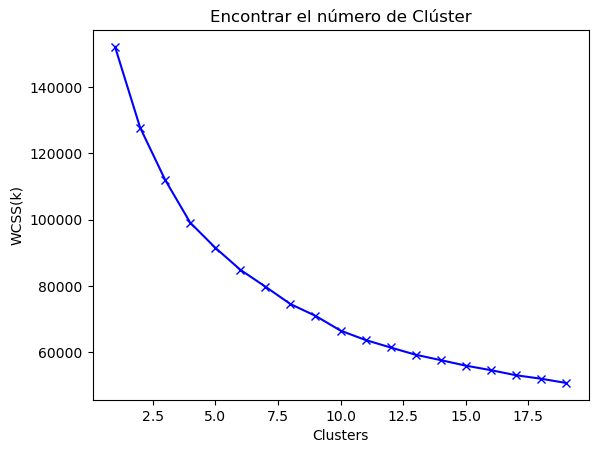

In [132]:
#Buscar el número óptimo de Clusters
scores_1=[]
range_values=range(1,20)

for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_) #WCS
    
plt.plot(range_values,scores_1,'bx-')
plt.title('Encontrar el número de Clúster')
plt.xlabel('Clusters')
plt.ylabel('WCSS(k)')
plt.show()

In [133]:
#Clusters=8
kmeans=KMeans(8)
kmeans.fit(df_scaled)
labels=kmeans.labels_

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [134]:
kmeans.cluster_centers_.shape

(8, 17)

In [135]:
clusters_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])
clusters_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.357980,0.332814,-0.029808,-0.240800,0.371715,-0.362433,0.996459,-0.381675,1.207982,-0.471696,-0.359481,0.194770,-0.259207,-0.213081,-0.029457,0.311834,0.256155
1,-0.700927,-2.134976,-0.309609,-0.234414,-0.301293,-0.323009,-0.551962,-0.440176,-0.437869,-0.522152,-0.376732,-0.417675,-0.175215,-0.202050,-0.257077,0.286244,0.201907
2,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
3,1.678127,0.391989,-0.219443,-0.155917,-0.232490,2.000640,-0.477281,-0.209240,-0.419008,1.912438,1.917406,-0.268387,1.018580,0.815150,0.550264,-0.391684,0.070464
4,0.009304,0.404522,-0.354821,-0.239441,-0.398966,-0.097440,-0.843822,-0.385593,-0.751888,0.096917,-0.032334,-0.478584,-0.305026,-0.251281,-0.013234,-0.455058,0.273785
5,-0.337200,-0.351274,-0.287007,-0.212744,-0.287412,0.067931,-0.202320,-0.283605,-0.226363,0.305828,-0.000825,-0.387485,-0.562891,-0.391704,-0.209098,0.013610,-3.199775
6,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
7,-0.121794,0.403177,0.562836,0.682593,0.076570,-0.332657,0.997330,1.912127,0.213389,-0.417315,-0.333448,0.657632,0.461305,0.161811,-0.155380,0.456974,0.272847


In [136]:
clusters_centers=scaler.inverse_transform(clusters_centers)
clusters_centers=pd.DataFrame(data=clusters_centers,columns=[df.columns])
clusters_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,819.370633,0.956111,939.519856,192.758423,747.204529,218.831526,0.890278,0.088597,0.844520,0.040753,0.795635,19.551091,3551.349307,1116.294296,795.557931,0.244921,11.860119
1,105.554654,0.371515,341.720379,203.358887,138.611745,301.506679,0.268822,0.071145,0.190417,0.030656,0.677909,4.327993,3856.947255,1148.228330,265.100272,0.237436,11.787521
2,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
3,5057.355525,0.970129,534.360524,333.646765,200.829556,5174.306936,0.298795,0.140037,0.197913,0.517843,16.333713,8.038724,8200.460758,4092.922242,2146.573524,0.039154,11.611617
4,1583.839537,0.973098,245.123337,195.014547,50.287512,774.534620,0.151684,0.087428,0.065618,0.154538,3.028169,2.814012,3384.639461,1005.708560,833.365231,0.020618,11.883713
5,862.621956,0.794057,390.010464,239.326032,151.164432,1121.325562,0.409150,0.117853,0.274475,0.196343,3.243200,5.078400,2446.423119,599.199915,376.911693,0.157695,7.235200
6,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
7,1310.971222,0.972780,2205.711585,1725.402324,480.309261,281.274187,0.890627,0.772882,0.449243,0.051635,0.973286,31.056100,6172.864891,2201.570499,502.100185,0.287372,11.882458


In [137]:
labels.shape

(8950,)

In [138]:
labels.min()

0

In [139]:
labels.max()

7

In [140]:
y_kmeans= kmeans.fit_predict(df_scaled)
y_kmeans

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 5, ..., 6, 6, 6])

In [141]:
df_cluster=pd.concat([df,pd.DataFrame({'cluster':labels})],axis=1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


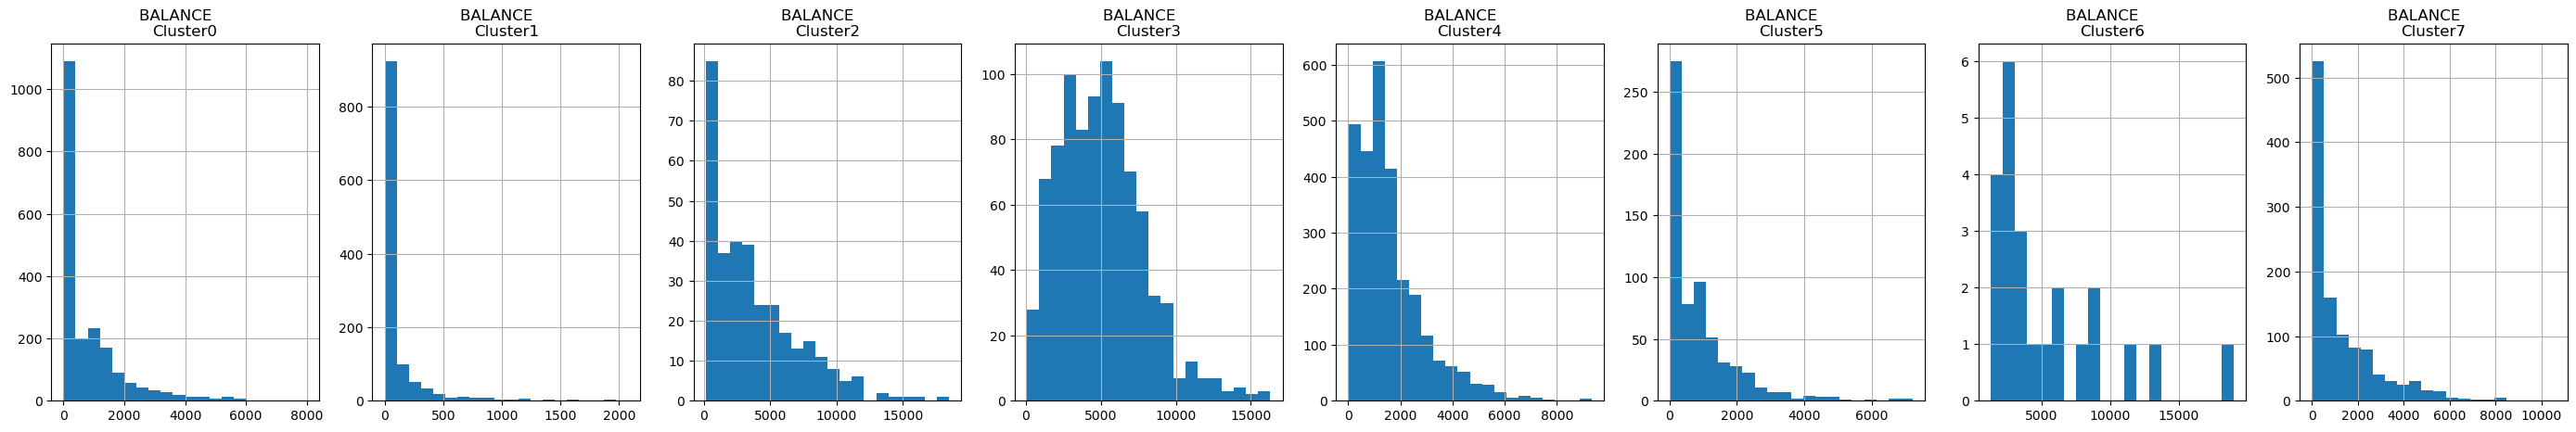

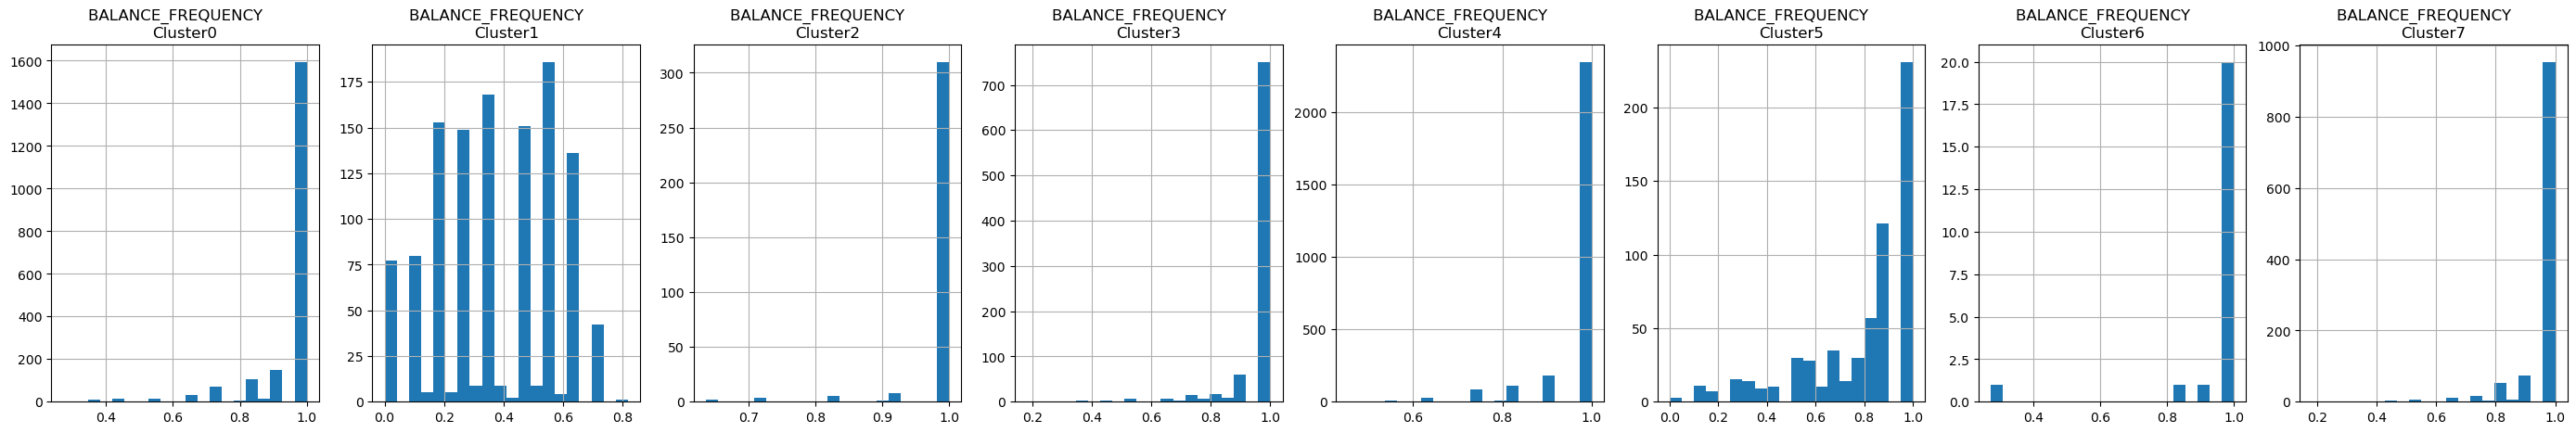

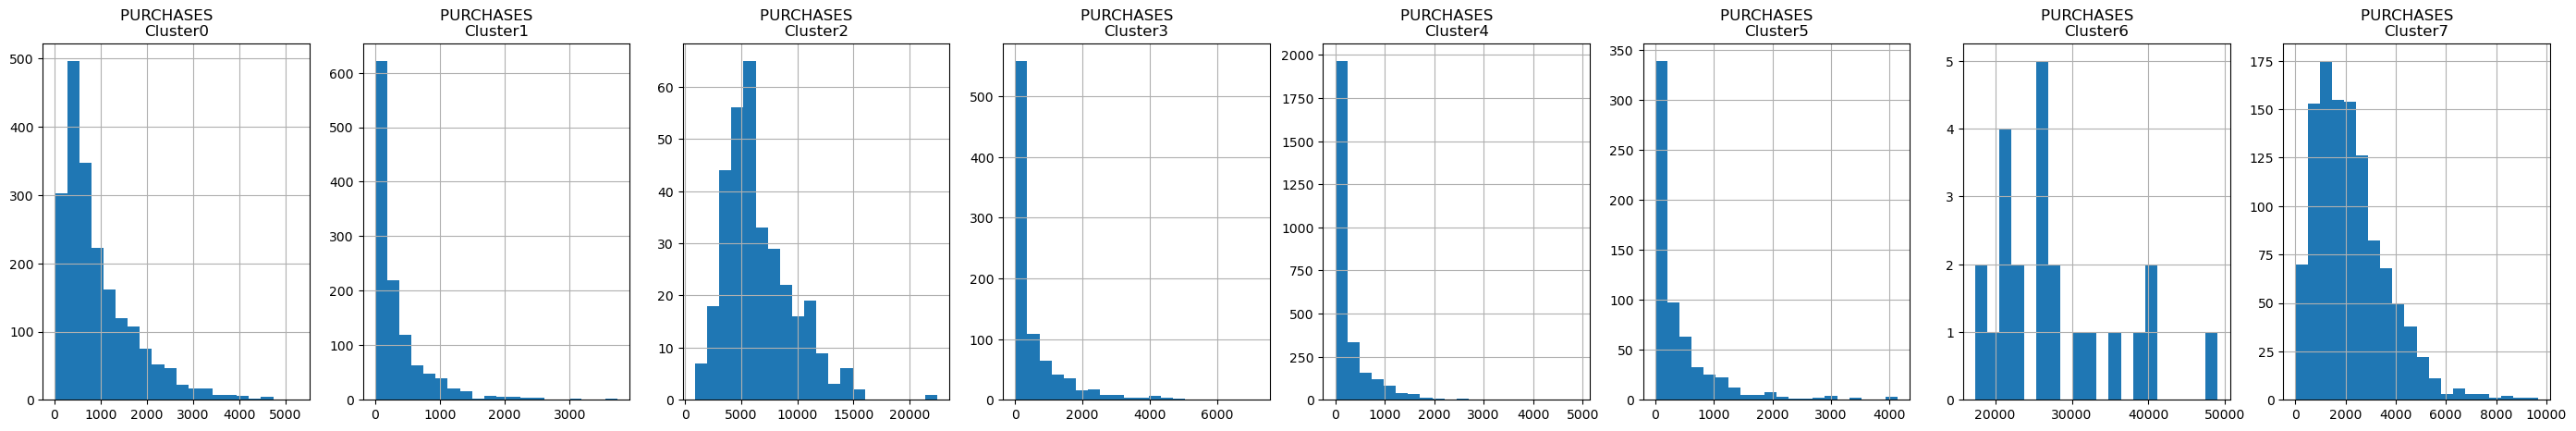

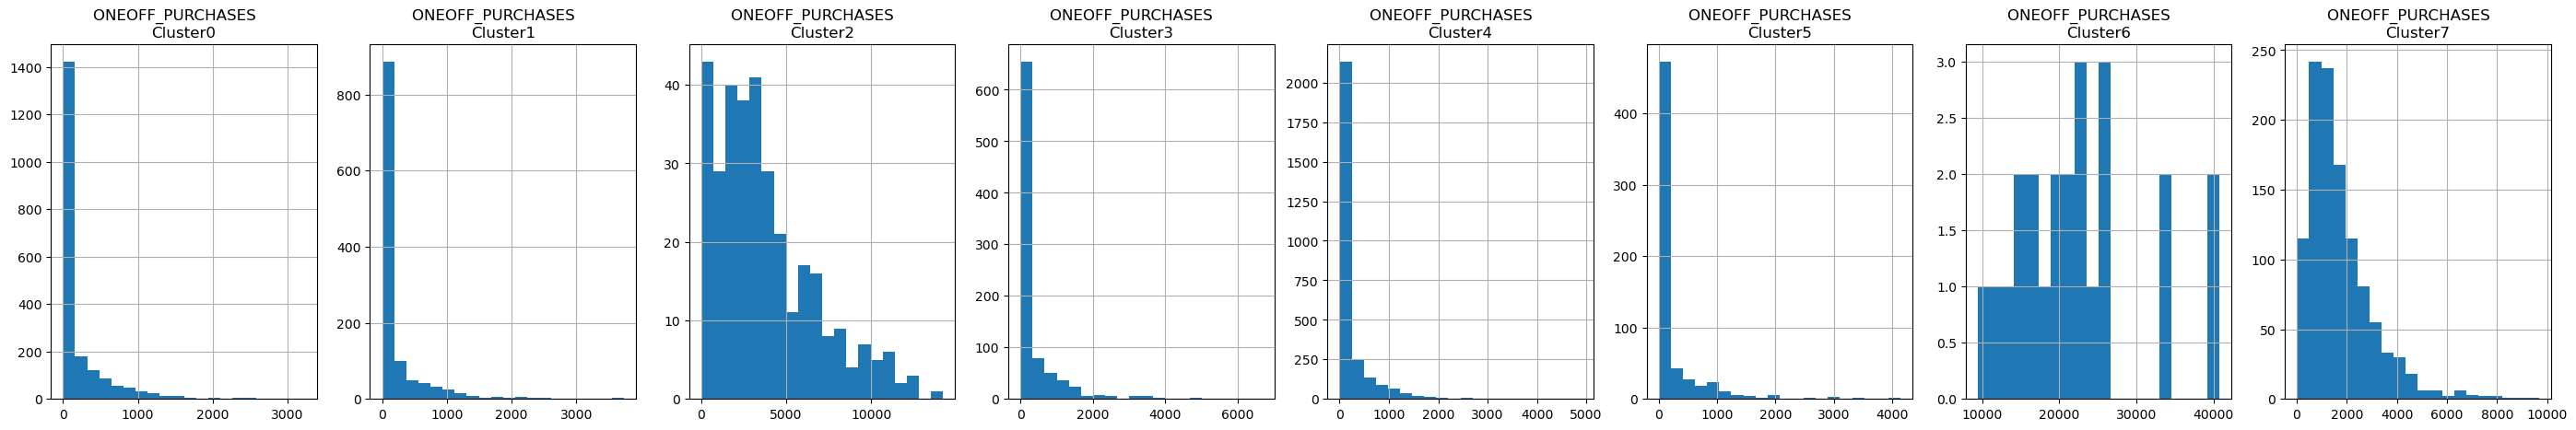

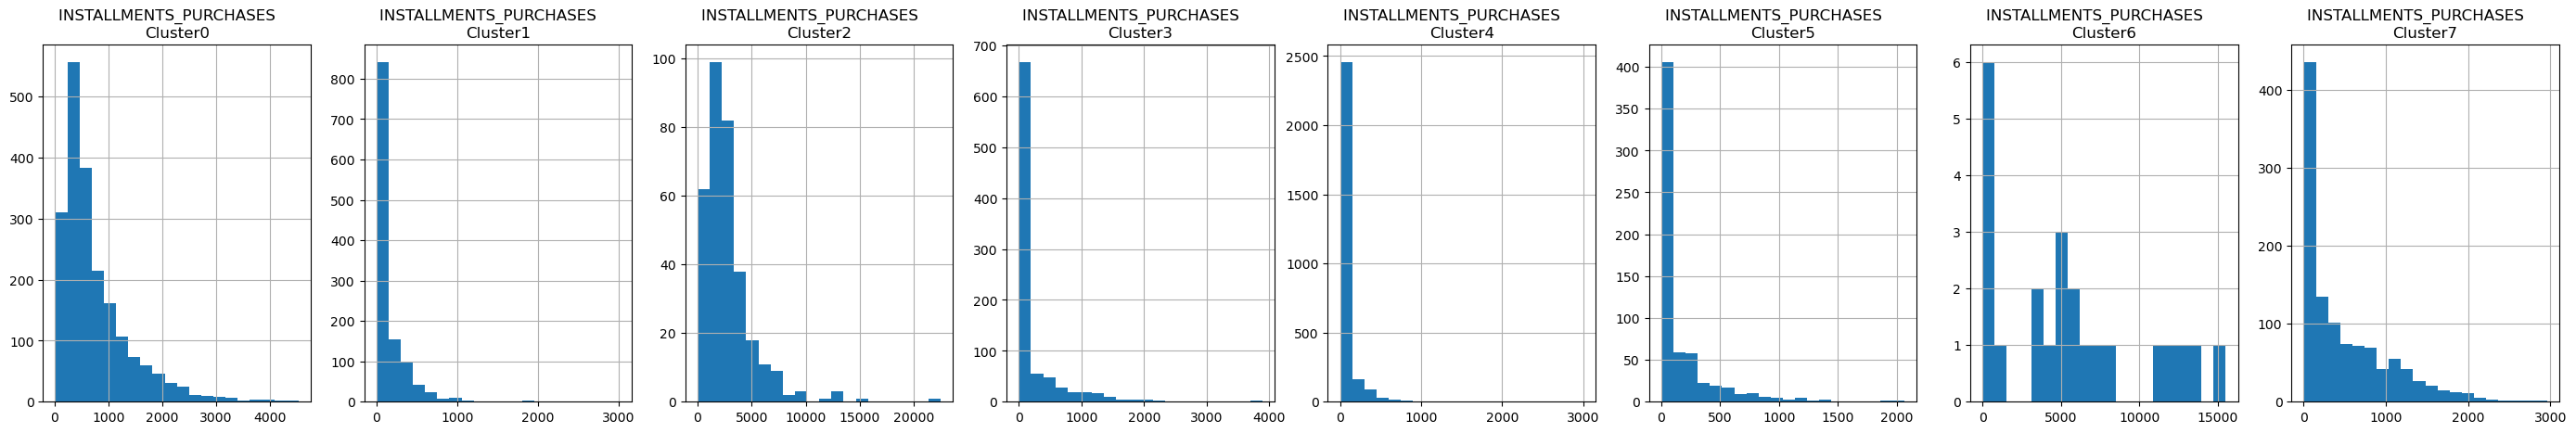

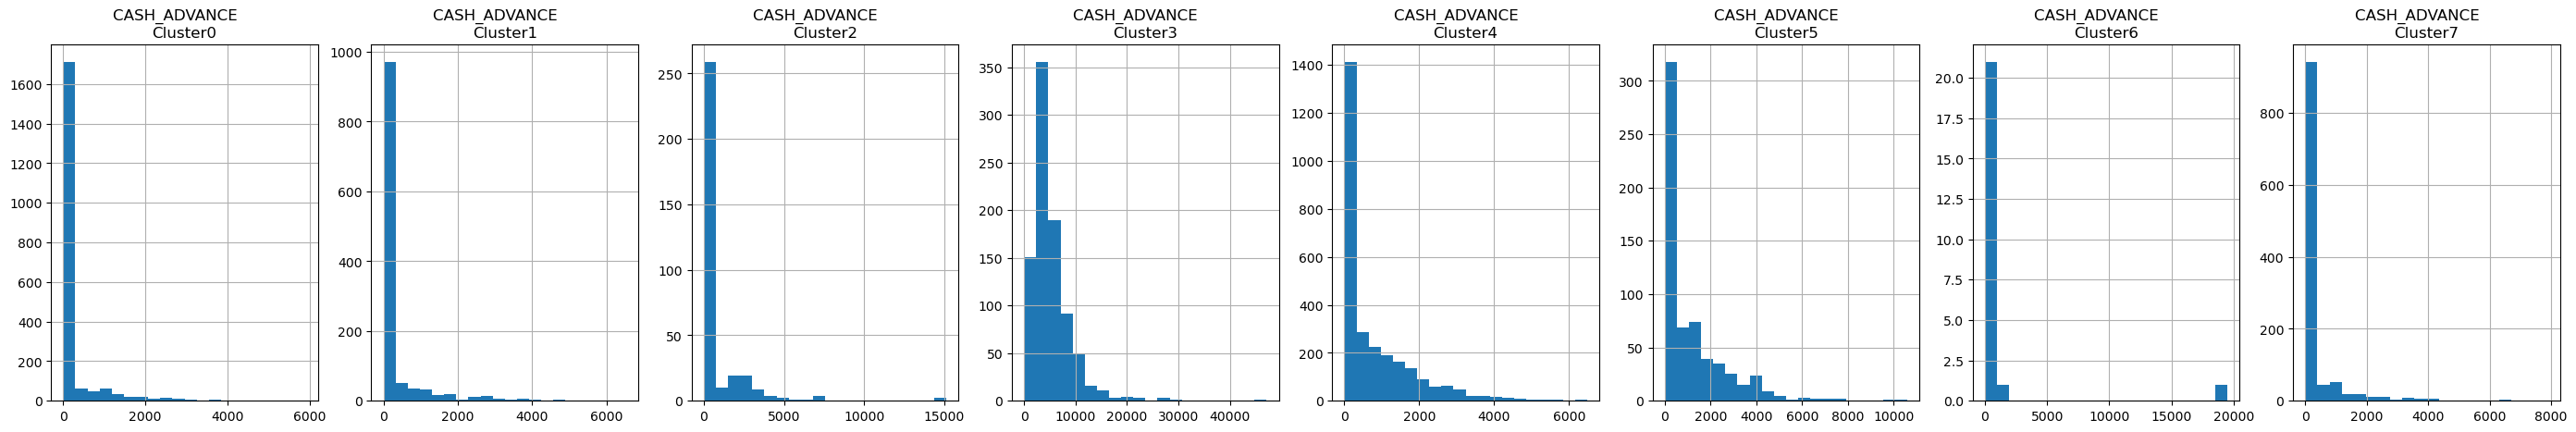

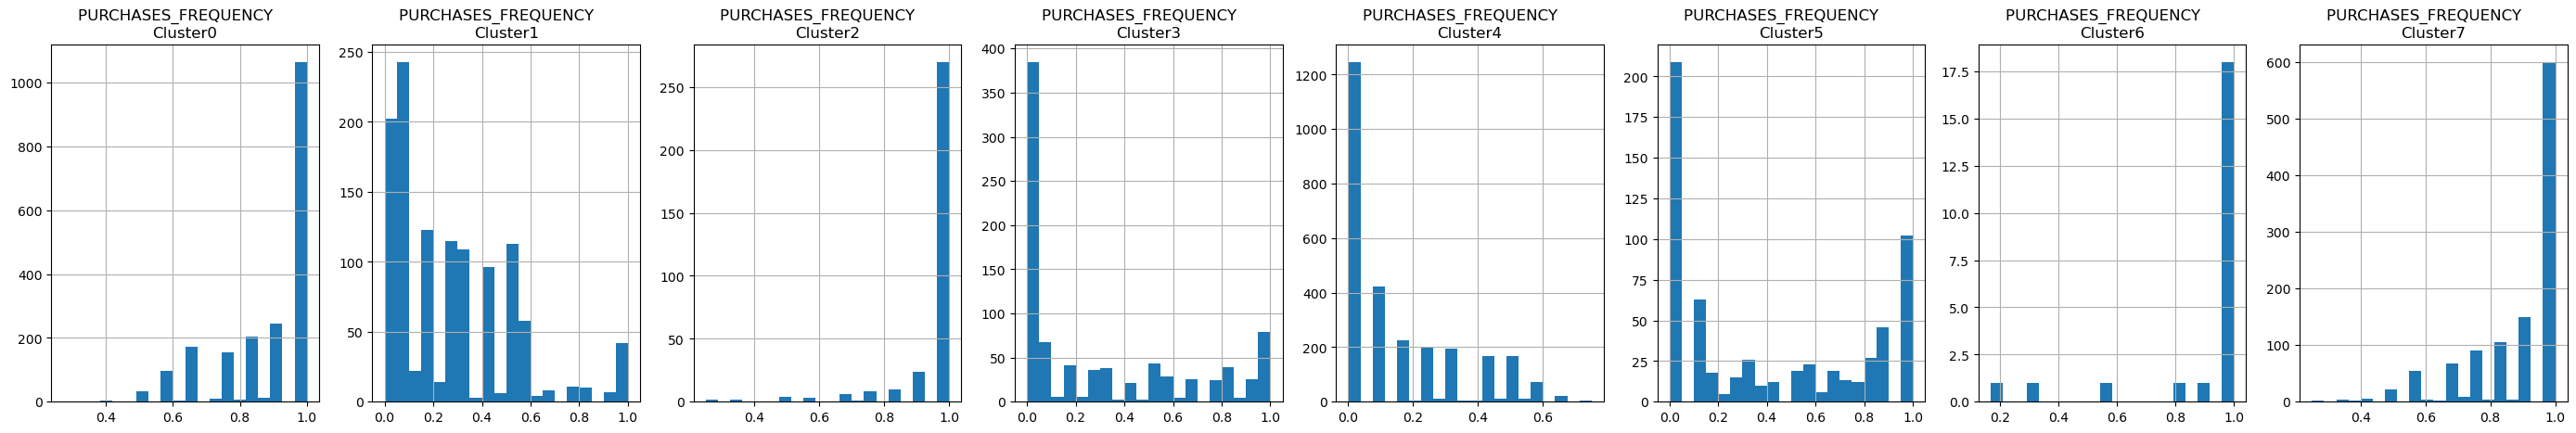

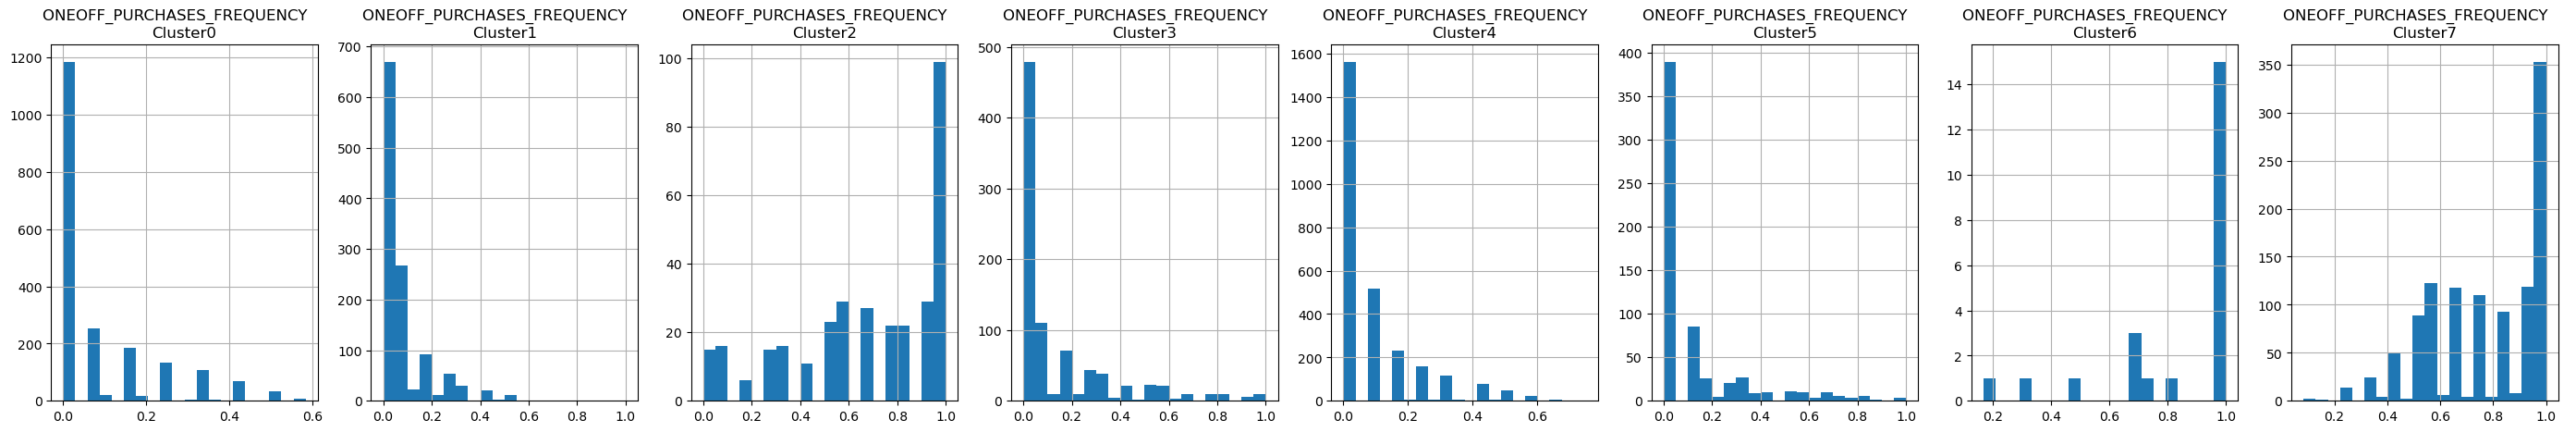

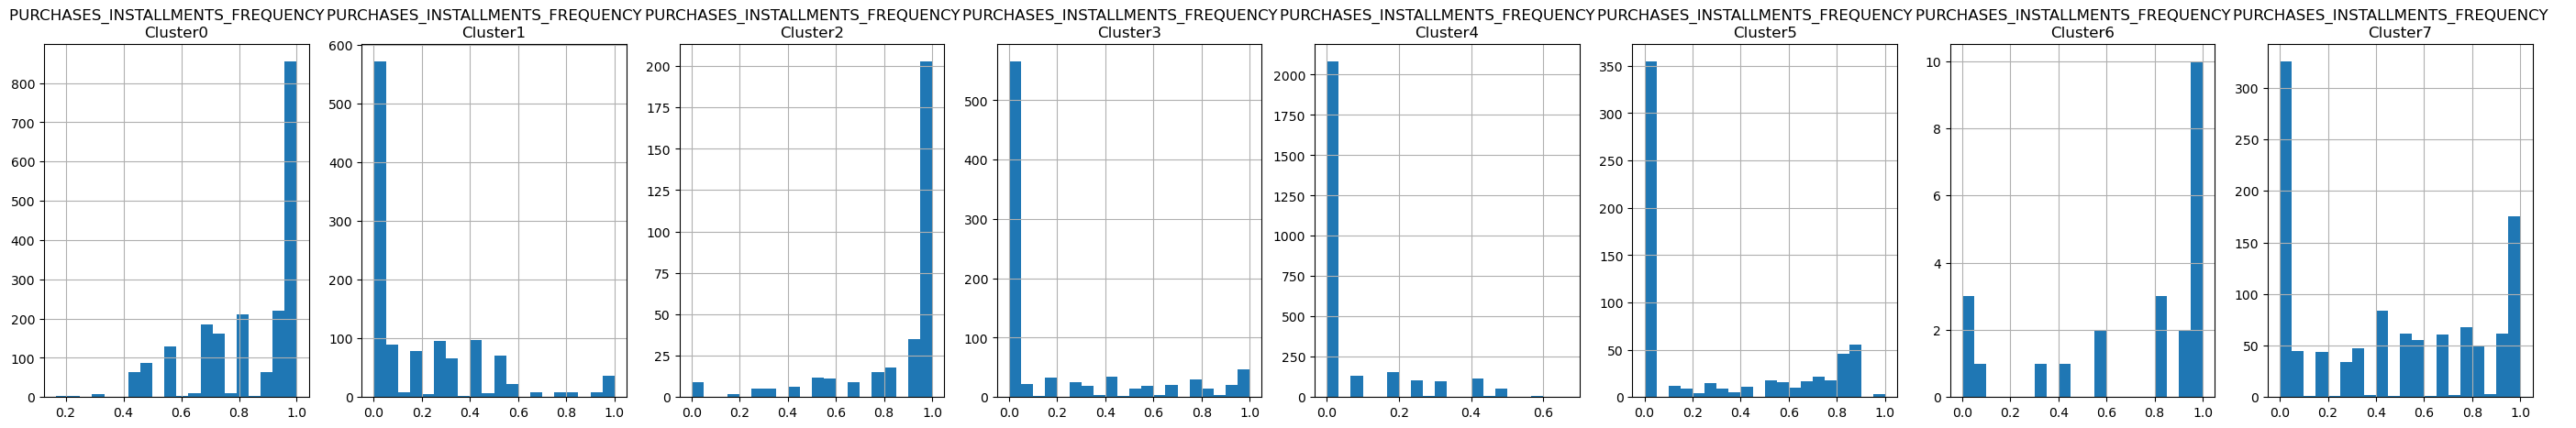

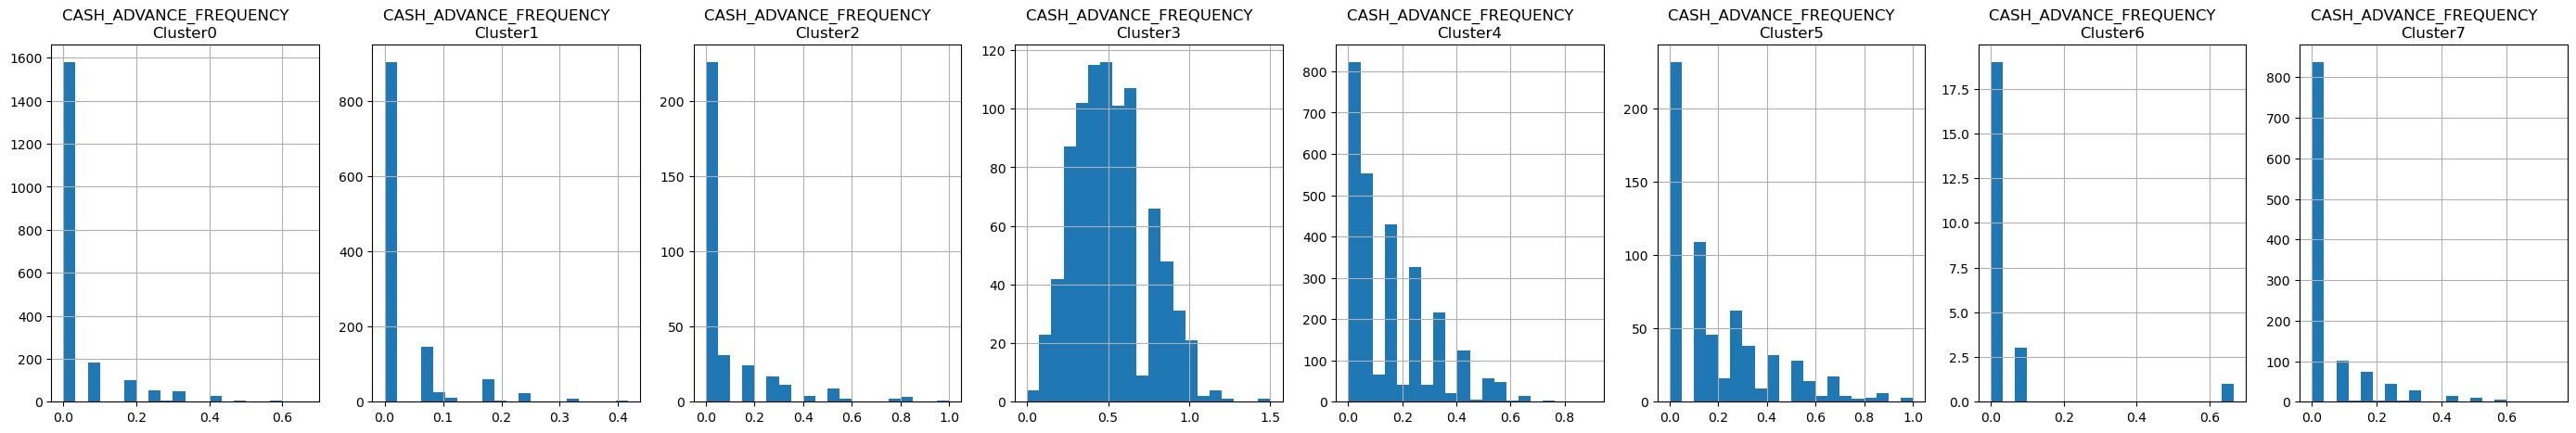

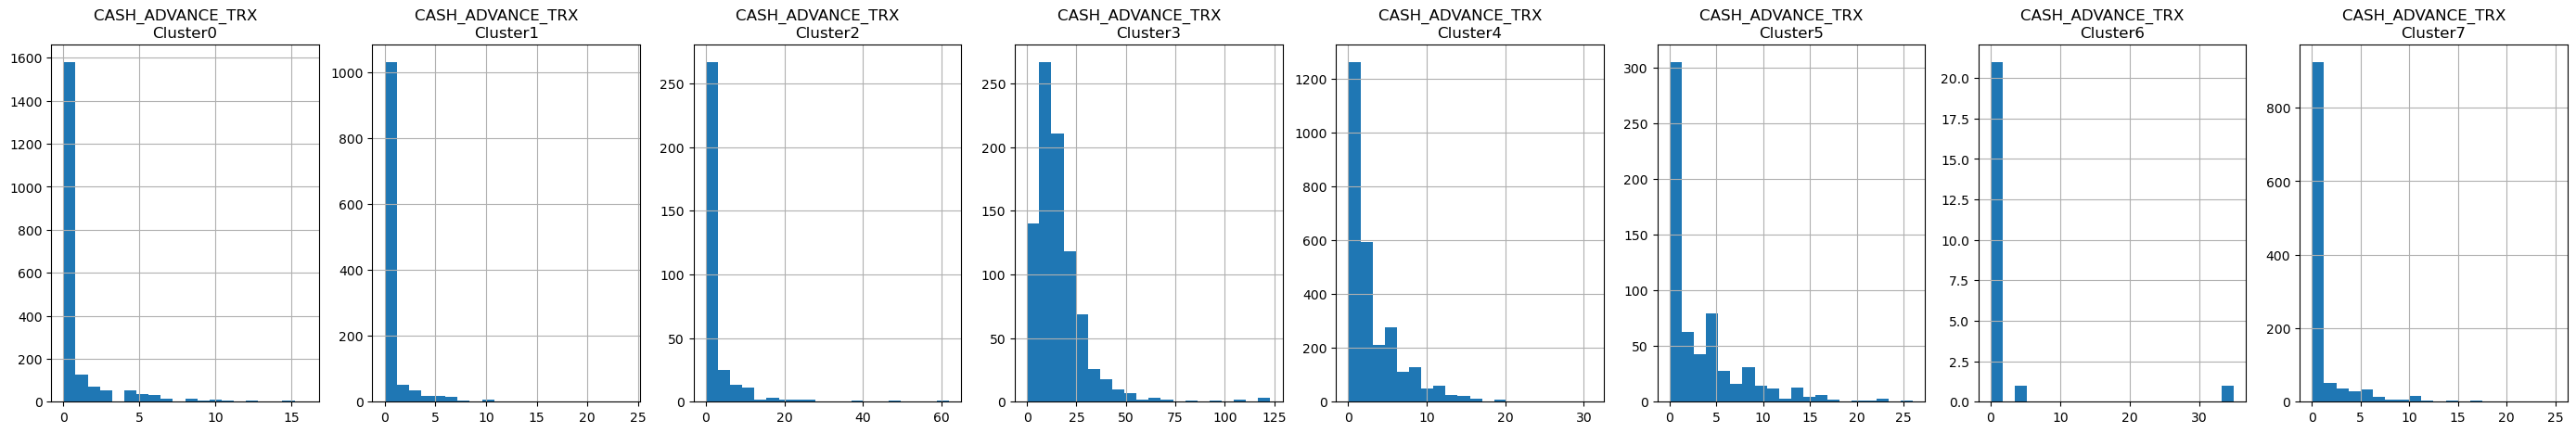

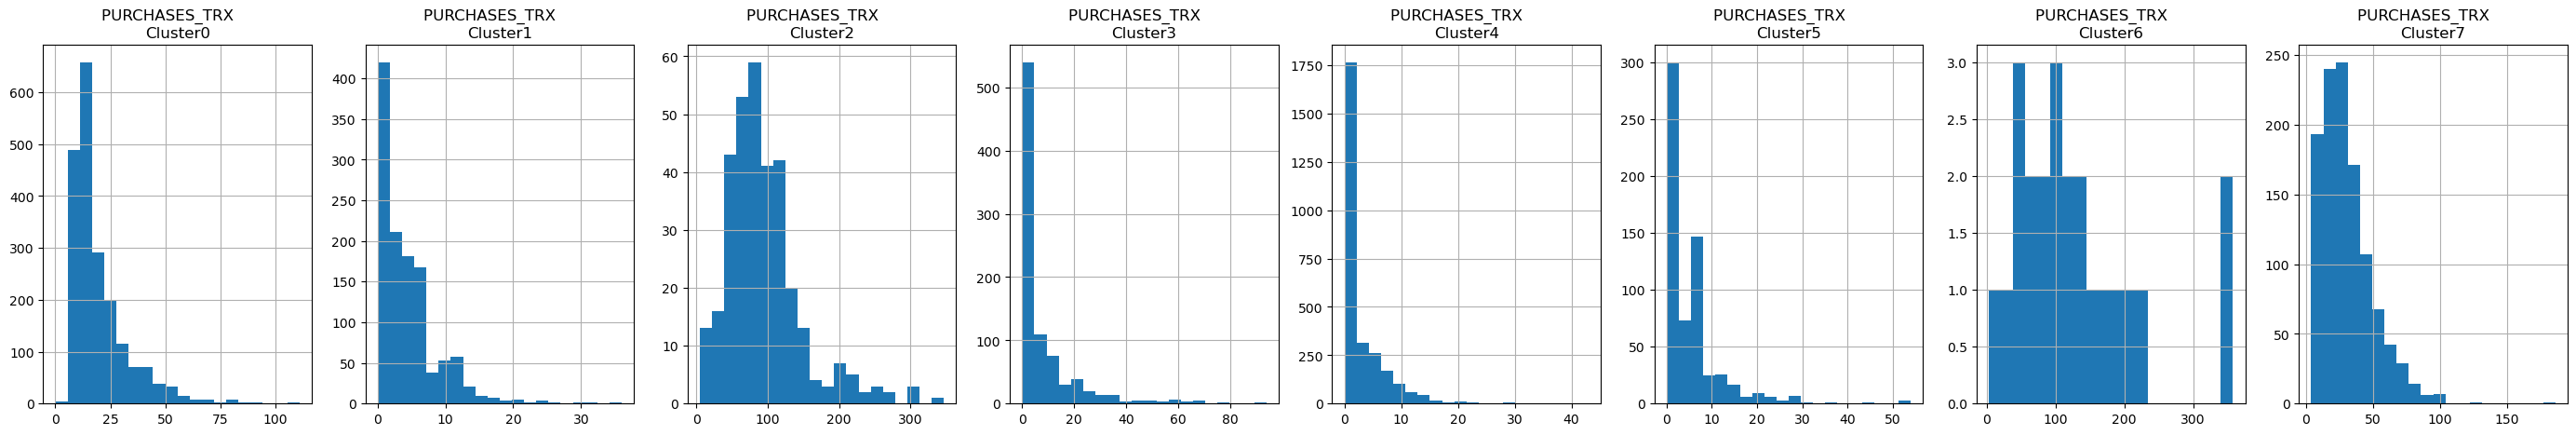

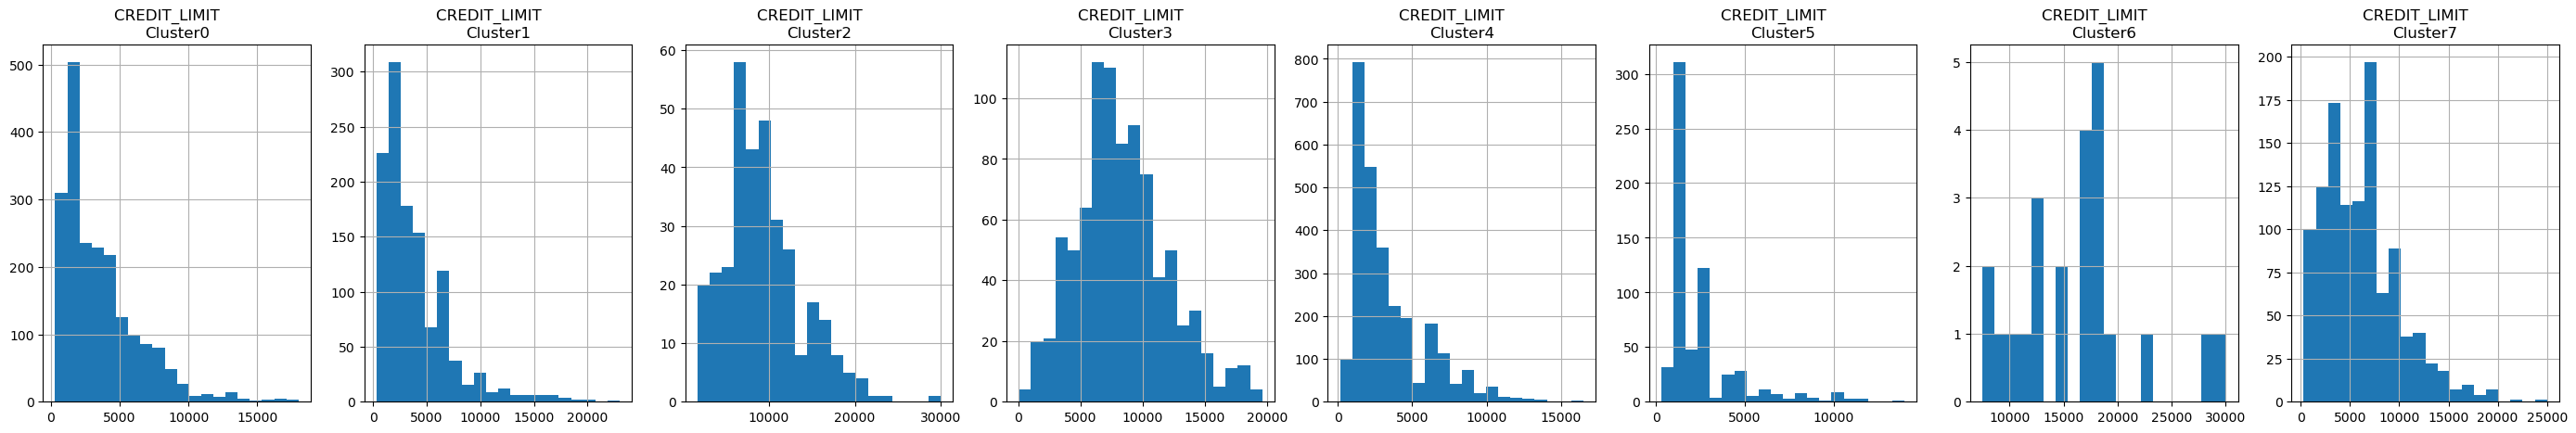

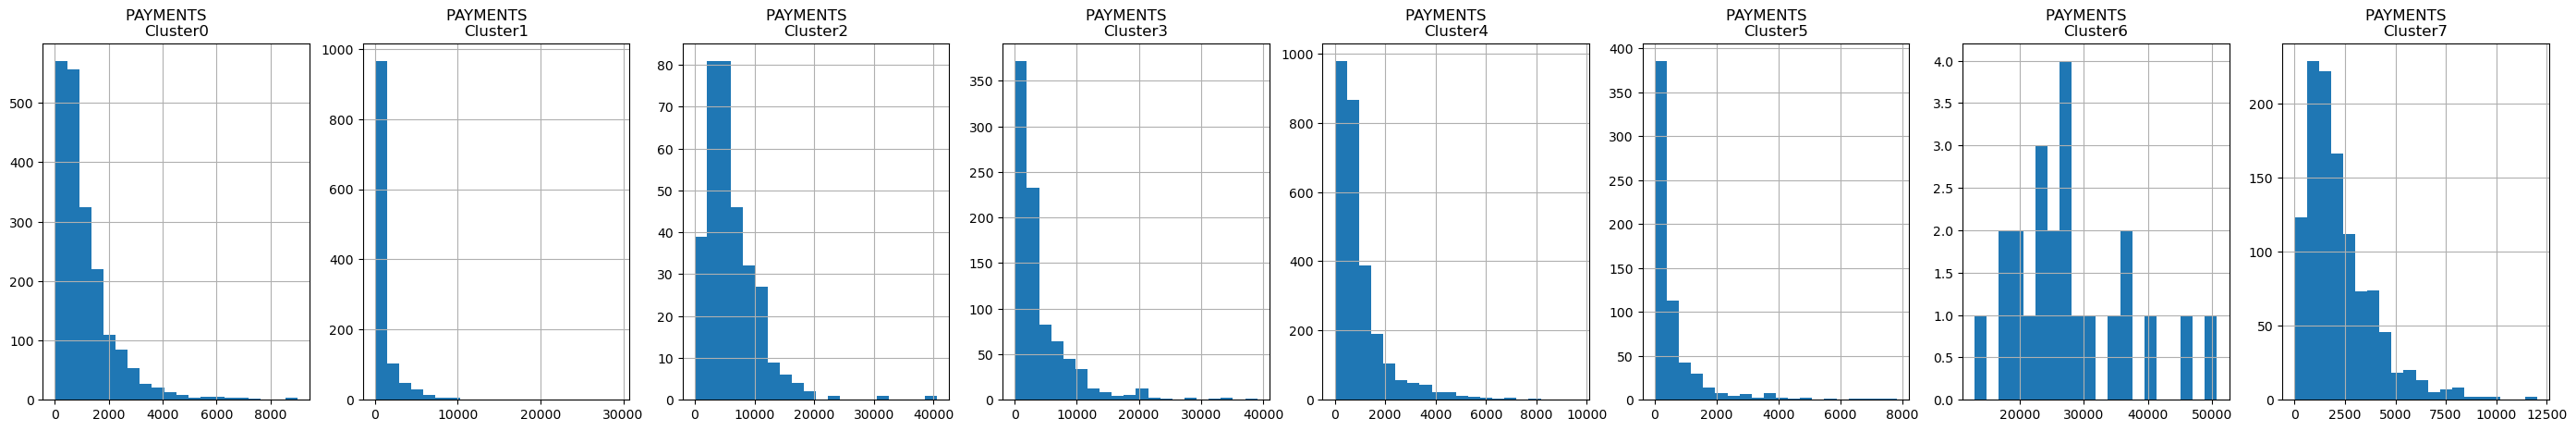

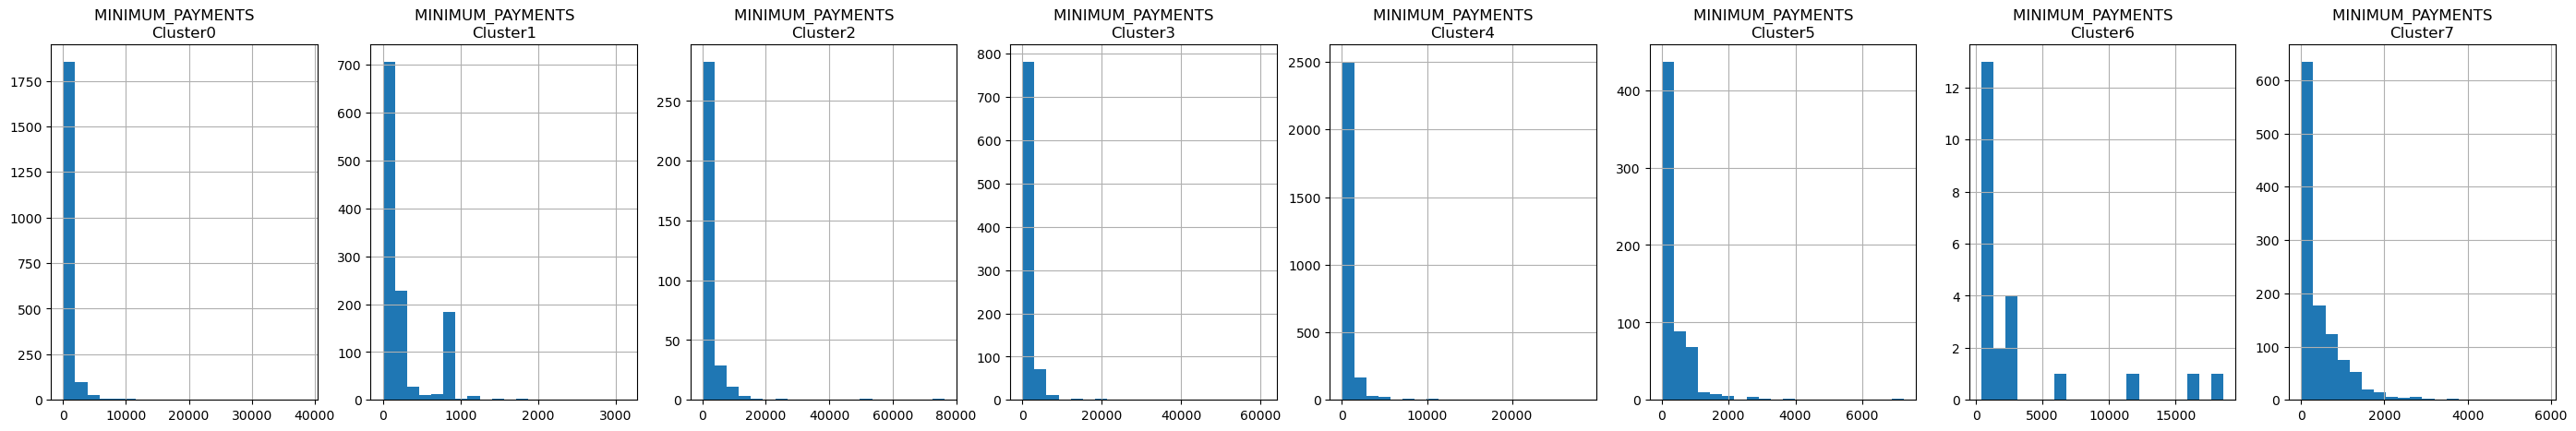

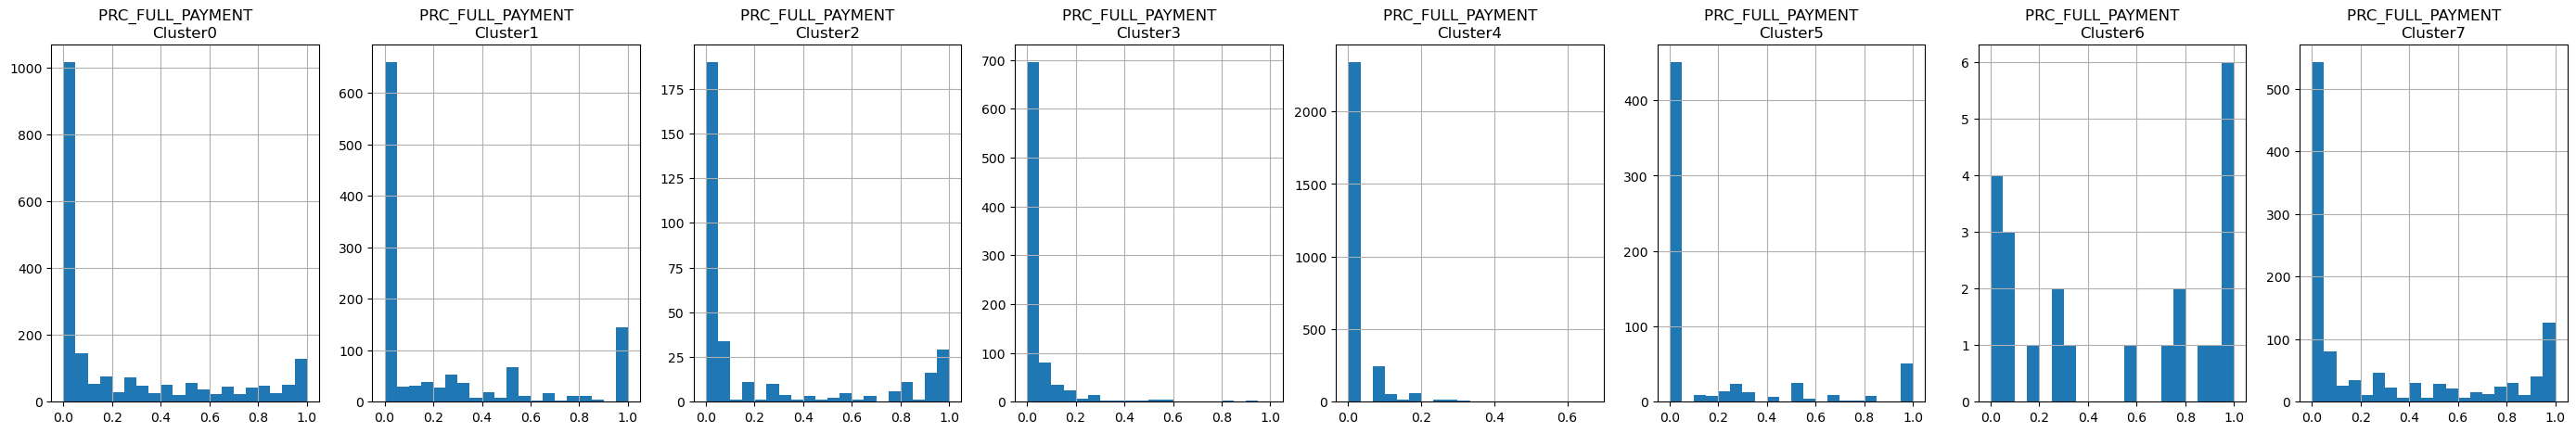

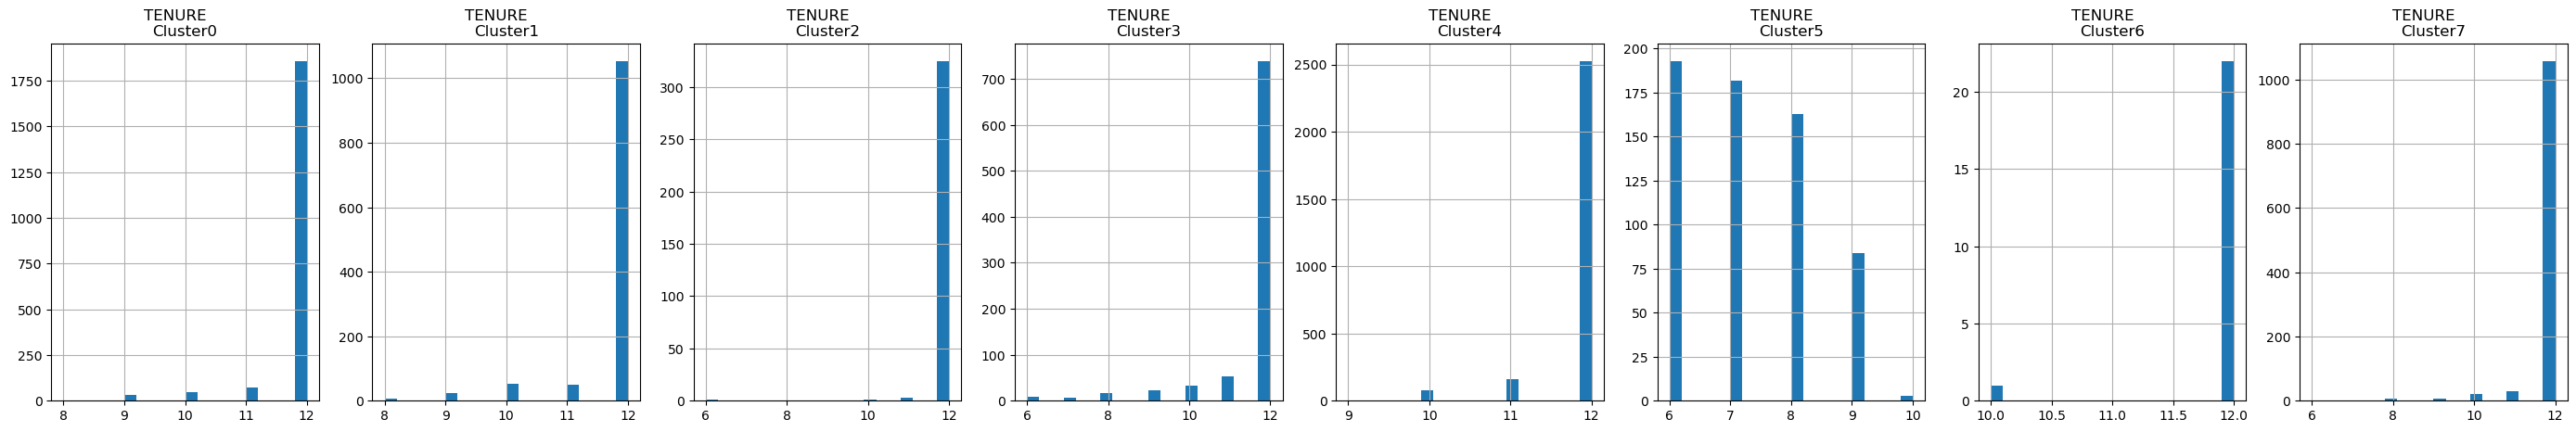

In [142]:
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range (8):
        plt.subplot(1,8,j+1)
        cluster=df_cluster[df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{}    \nCluster{}'.format(i,j))
    plt.show()

In [143]:
pca= PCA(n_components=2)
principal_comp= pca.fit_transform(df_scaled)
principal_comp


array([[-1.6822205 , -1.07645028],
       [-1.13829406,  2.50648701],
       [ 0.96967906, -0.38352969],
       ...,
       [-0.92620356, -1.81078578],
       [-2.33654919, -0.65796388],
       [-0.55642071, -0.40046677]])

In [144]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pcal','pca2'])
pca_df.head()

,pcal,pca2
0,-1.682220,-1.076450
1,-1.138294,2.506487
2,0.969679,-0.383530
3,-0.873629,0.043156
4,-1.599434,-0.688577


In [145]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pcal,pca2,cluster
0,-1.682220,-1.076450,4
1,-1.138294,2.506487,3
2,0.969679,-0.383530,7
3,-0.873629,0.043156,4
4,-1.599434,-0.688577,4


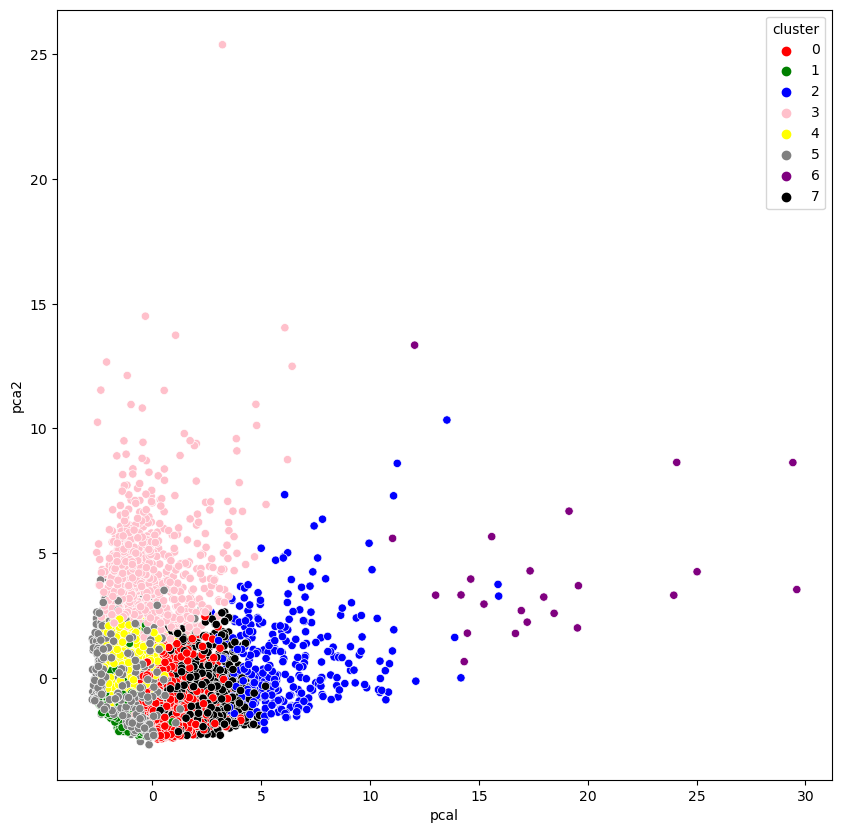

In [146]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pcal', y='pca2',hue='cluster',data=pca_df,
                  palette=['red','green','blue','pink','yellow','gray','purple','black'])
plt.show()

In [147]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape = (17, ))

# Glorot normal inicializador (Xavier normal initializer) tomar muestras aleatorias de una distribución normal truncada

x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)


autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [148]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_8 (Dense)             (None, 7)                 126       
                                                                 
 dense_9 (Dense)             (None, 500)               4000      
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_12 (Dense)            (None, 10)                20010     
                                                                 
 dense_13 (Dense)            (None, 2000)              2200

In [149]:
autoencoder.fit(df_scaled,df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 2s 13ms/step - loss: 0.5907
Epoch 2/25
70/70 [==============================] - 1s 13ms/step - loss: 0.3642
Epoch 3/25
70/70 [==============================] - 1s 13ms/step - loss: 0.2738
Epoch 4/25
70/70 [==============================] - 1s 13ms/step - loss: 0.2246
Epoch 5/25
70/70 [==============================] - 1s 13ms/step - loss: 0.1973
Epoch 6/25
70/70 [==============================] - 1s 12ms/step - loss: 0.1804
Epoch 7/25
70/70 [==============================] - 1s 13ms/step - loss: 0.1692
Epoch 8/25
70/70 [==============================] - 1s 13ms/step - loss: 0.1608
Epoch 9/25
70/70 [==============================] - 1s 13ms/step - loss: 0.1472
Epoch 10/25
70/70 [==============================] - 1s 13ms/step - loss: 0.1387
Epoch 11/25
70/70 [==============================] - 1s 13ms/step - loss: 0.1311
Epoch 12/25
70/70 [==============================] - 1s 13ms/step - loss: 0.1354
Epoch 13/25
70/70 [==================

In [150]:
autoencoder.save_weights('autoencoder.h5')

In [151]:
pred= encoder.predict(df_scaled)

280/280 [==============================] - 0s 1ms/step


In [152]:
pred.shape

(8950, 10)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

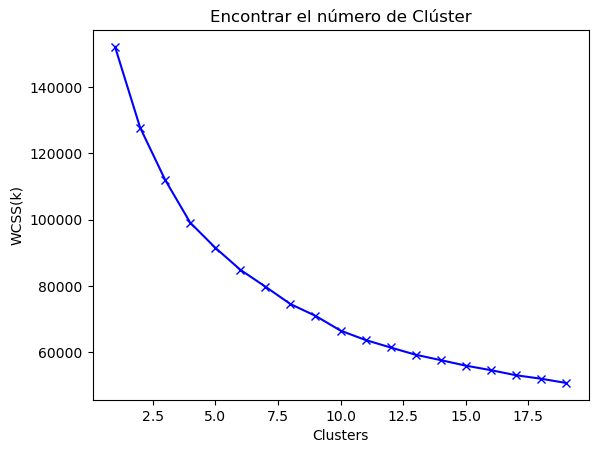

In [153]:
#Buscar el número óptimo de Clusters
scores_2=[]
range_values=range(1,20)

for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_) #WCS
    
plt.plot(range_values,scores_1,'bx-')
plt.title('Encontrar el número de Clúster')
plt.xlabel('Clusters')
plt.ylabel('WCSS(k)')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_24416\2333748287.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range_values,scores_1,'bx-',color='r')
C:\Users\PC\AppData\Local\Temp\ipykernel_24416\2333748287.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range_values,scores_2,'bx-',color='g')


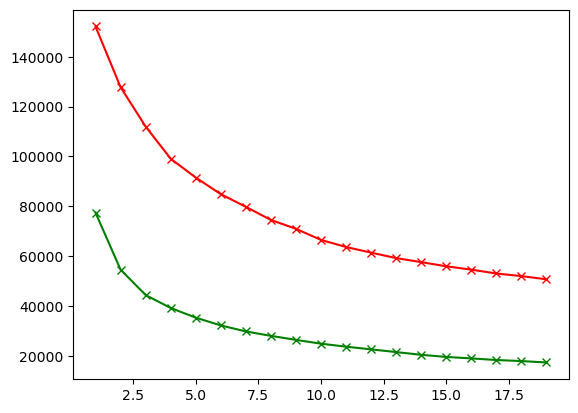

In [154]:
plt.plot(range_values,scores_1,'bx-',color='r')
plt.plot(range_values,scores_2,'bx-',color='g')

In [155]:
#Clusters=8
kmeans=KMeans(4)
kmeans.fit(pred)
labels=kmeans.labels_
y_kmeans=kmeans.fit_predict(pred)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [156]:
df_cluster_dr=pd.concat([df,pd.DataFrame({'cluster':labels})], axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [157]:
pca=PCA(n_components=2)
princ_comp=pca.fit_transform(pred)
pca_df=pd.DataFrame(data=princ_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.723039,-0.116558
1,0.284546,1.542461
2,-0.149007,-0.297226
3,-1.734650,0.001852
4,-2.088630,-0.205040


In [158]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,pca1,pca2,cluster
0,-1.723039,-0.116558,1
1,0.284546,1.542461,3
2,-0.149007,-0.297226,1
3,-1.734650,0.001852,1
4,-2.088630,-0.205040,1
...,...,...,...
8945,-0.285003,-1.259551,1
8946,-1.343686,-0.896822,1
8947,-1.123881,-0.895845,1
8948,-2.282438,-0.449897,1


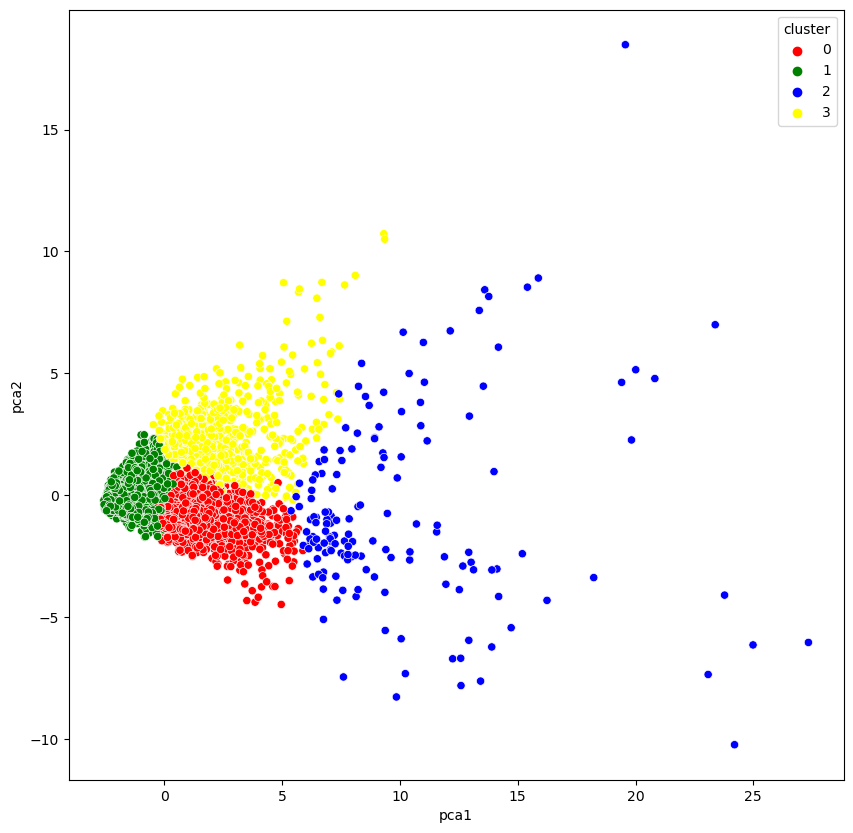

In [159]:
plt.figure(figsize=(10,10))
ax= sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','blue','yellow'])
plt.show()